# Complete several of the Matplotlib tutorials at the following link until you feel comfortable: Matplotlib Tutorials. 

## Using a data set of your choice, write an introduction explaining the data set.

### The dataset of choice is taken from The Baseball Cube website, which contains payroll information regarding Major League Baseball (MLB) information from 1988-2019.  Total payroll for the summed MLB teams, League minimum, average player salary, player count, team count, top player salary, highest team payroll, and lowest team payroll are all described in these specific years. 

## Identify a question or question(s) that you would like to explore in your data set.

In [15]:
### 1. I would like to know how the team payroll ($) has changed over time (Year vs. Total Payroll)
### 2. I would like to know how the MLB Player count has changed over time (Year vs. Player Count)
### 3. I would like to know which MLB Team has spent the most overall in payroll from 1988-2021
### 4. I would like to know which MLB Players have the top salaries from 1988-2020 (Top Salary Player Name and Top Player Salary)

## Create at least three graphs that help answer these questions. Make sure your graphs are clearly readable and are labeled appropriately and professionally.

In [16]:
# Import libraries pandas, numpy, matplot lib and warnings to filter them if they come up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Import the data by webscraping it from the baseball cube website
url_BB = "http://www.thebaseballcube.com/topics/payrolls/"
list_of_df_BB = pd.read_html(url_BB, header=0)
df_BB = list_of_df_BB[0] 
# Remove column headers 9-49 as the information is NaN
BB_columns = df_BB.dropna(axis=1)
df_BB_columns = pd.DataFrame(BB_columns)
# Change "Highest Payroll" and "Lowest Payroll" to "Highest Team Payroll" and "Lowest Team Payroll"
df_BB_columns = df_BB_columns.rename(columns={'Highest Payroll':'Highest Team Payroll', 'Lowest Payroll': 'Lowest Team Payroll'})
# Remove rows 20 and 33 as they do not contain data
df_BB_columns = df_BB_columns.drop(df_BB_columns.index[[20,33]])
df_BB_columns.head()
# Split column data: Highest Payroll, Lowest Payroll and Top Salary
df_BB_columns[['Highest Team Name','Highest Team Payroll']] = df_BB_columns['Highest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Lowest Team Name','Lowest Team Payroll']] = df_BB_columns['Lowest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Top Salary Player Name','Top Player Salary']] = df_BB_columns['Top Salary'].str.split("$",expand=True,)
# Clean up column data: remove open and closed parantheses on split columns
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].astype(int)
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].astype(int)
df_BB_columns['Highest Team Name'] = df_BB_columns['Highest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Lowest Team Name'] = df_BB_columns['Lowest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Top Salary Player Name'] = df_BB_columns['Top Salary Player Name'].str.replace(r"[(]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].str.replace(r"[),]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].astype(int)

# format year column using to_datetime function
df_BB_columns.Year = pd.to_datetime(df_BB_columns.Year, format='%Y') 


df_BB_columns.head(10)

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Highest Team Name,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019-01-01,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1448,30,"Max Scherzer ($42,142,857)",222171123,60444931,Boston Red Sox,Tampa Bay Rays,Max Scherzer,42142857
1,2018-01-01,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)",235649368,68534631,Boston Red Sox,Oakland Athletics,Mike Trout,33250000
2,2017-01-01,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)",187989811,34574400,Los Angeles Dodgers,San Diego Padres,Clayton Kershaw,33000000
3,2016-01-01,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)",253639162,62964319,Los Angeles Dodgers,Milwaukee Brewers,Clayton Kershaw,32000000
4,2015-01-01,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)",230352402,65770333,Los Angeles Dodgers,Arizona Diamondbacks,Clayton Kershaw,31000000
5,2014-01-01,"$ 3,453,960,397","$ 500,000","$ 3,818,923",1324,30,"Zack Greinke ($28,000,000)",235295219,44544174,Los Angeles Dodgers,Houston Astros,Zack Greinke,28000000
6,2013-01-01,"$ 3,187,568,088","$ 490,000","$ 3,386,212",1313,30,"Alex Rodriguez ($29,000,000)",228995945,24328538,New York Yankees,Houston Astros,Alex Rodriguez,29000000
7,2012-01-01,"$ 2,940,657,192","$ 480,000","$ 3,213,479",1291,30,"Alex Rodriguez ($30,000,000)",197962289,55244700,New York Yankees,San Diego Padres,Alex Rodriguez,30000000
8,2011-01-01,"$ 2,786,161,291","$ 414,000","$ 3,095,183",1306,30,"Alex Rodriguez ($32,000,000)",202689028,36126000,New York Yankees,Kansas City Royals,Alex Rodriguez,32000000
9,2010-01-01,"$ 2,730,601,685","$ 400,000","$ 3,014,572",1256,30,"Alex Rodriguez ($33,000,000)",206333389,34943000,New York Yankees,Pittsburgh Pirates,Alex Rodriguez,33000000


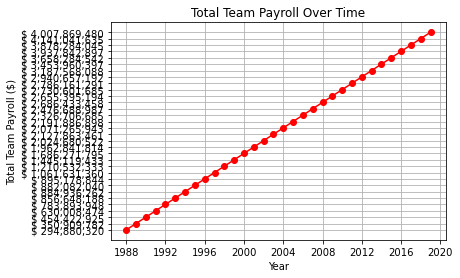

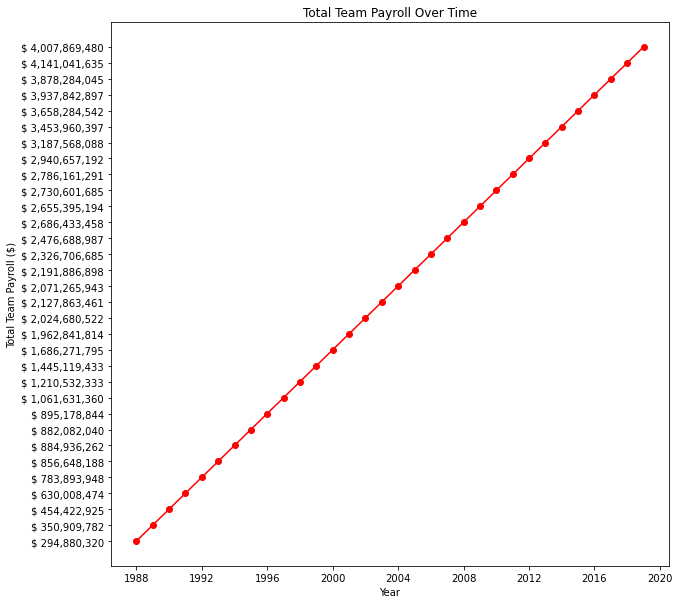

In [18]:
# Visualization 1: Year vs. Total Payroll (Line Chart)

# Plot in Default Size
plt.plot('Year','Total Payroll', data=df_BB_columns, color='red', marker='o') #plot the Year and Total Payroll columns of the df_BB_columns dataframe with a red line and dot markers
#plt.figure(figsize=(10, 10)) # changing the size of figure to 10X10
plt.title('Total Team Payroll Over Time') # Add title
plt.xlabel('Year') # Add x-axis label
plt.ylabel('Total Team Payroll ($)') # Add y-xaxis label
plt.gca().invert_yaxis() #invert the y-axis so its going from smallest to largest
plt.grid(True) # Add grid lines

# Plot in 10x10 size of figure for better viewing
plt.figure(figsize=(10, 10)) # changing the size of figure to 10X10
display(plt.plot('Year','Total Payroll', data=df_BB_columns, color='red', marker='o'))
plt.title('Total Team Payroll Over Time') # Add title
plt.xlabel('Year') # Add x-axis label
plt.ylabel('Total Team Payroll ($)') # Add y-xaxis label
plt.gca().invert_yaxis() #invert the y-axis so its going from smallest to largest
plt.show()

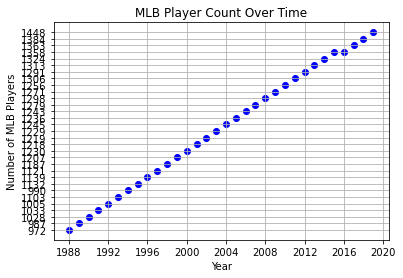

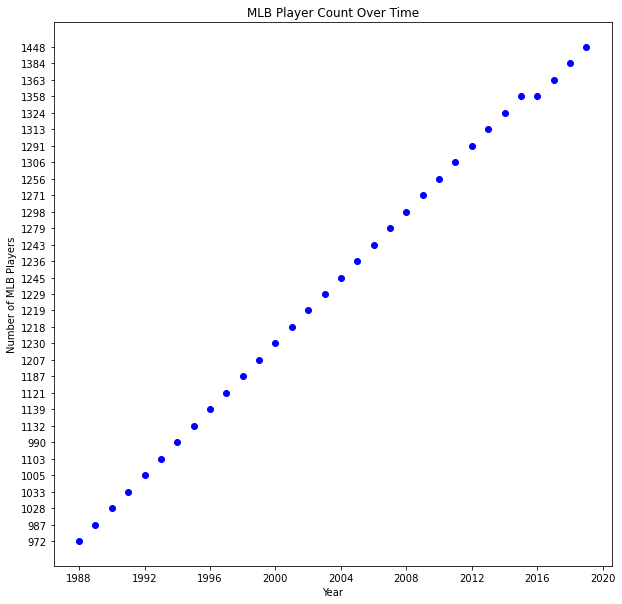

In [19]:
# Visualization 2: Year vs. Player Count (Scatter Plot)

# Plot in Default Size
plt.scatter('Year','Player Count', data=df_BB_columns, color='blue', marker='o') #plot the Year and Total Payroll columns of the df_BB_columns dataframe with a red line and dot markers
#plt.figure(figsize=(10, 10)) # changing the size of figure to 10X10
plt.title('MLB Player Count Over Time') # Add title
plt.xlabel('Year') # Add x-axis label
plt.ylabel('Number of MLB Players') # Add y-xaxis label
plt.gca().invert_yaxis() #invert the y-axis so its going from smallest to largest
plt.grid(True) # Add grid lines

# Plot in 5x10 size of figure for better viewing
plt.figure(figsize=(10, 10)) # changing the size of figure to 5X10
display(plt.scatter('Year','Player Count', data=df_BB_columns, color='blue', marker='o'))
plt.title('MLB Player Count Over Time') # Add title
plt.xlabel('Year') # Add x-axis label
plt.ylabel('Number of MLB Players') # Add y-xaxis label
plt.gca().invert_yaxis() #invert the y-axis so its going from smallest to largest
plt.show()

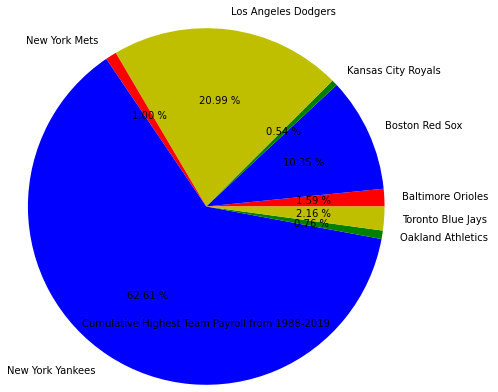

In [20]:
# Visualization 3: Highest Team Payroll and Highest Team Name

gb_team=df_BB_columns.groupby(by="Highest Team Name")[["Highest Team Payroll"]].sum() # group by the Highest Team Names and sum their highest team payrolls together
res=gb_team.reset_index() # create res and reset index of it
plt.pie(x="Highest Team Payroll",labels="Highest Team Name", data=res, autopct="%.2f %%",colors=["r","b","g","y"], radius = 2.05) #create pie chart with the Highest Team Payroll data in percent with labels of team name in red, blue, green and yellow colors with a radius of 2.05 
plt.xlabel("Cumulative Highest Team Payroll from 1988-2019") # Create x-axis label
plt.show()

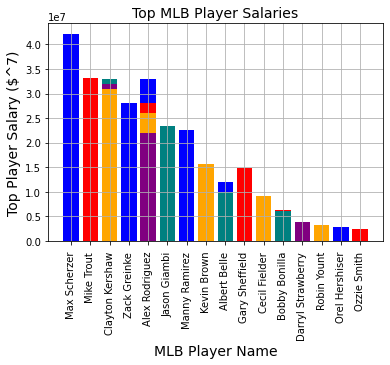

In [21]:
# Visualization 4: Top Player Salaries from 1988-2020 (Bar Chart)

New_Colors = ['blue','red','teal','purple','orange'] # Identify colors of the bars in bar chart
plt.bar(df_BB_columns['Top Salary Player Name'], df_BB_columns['Top Player Salary'], color=New_Colors) # Create bar chart
plt.title('Top MLB Player Salaries', fontsize=14) # Add chart title
plt.xlabel('MLB Player Name', fontsize=14) # Add x-axis label with font size of 14
plt.xticks(rotation=90) # change rotation of x-axis labels
plt.ylabel('Top Player Salary ($^7)', fontsize=14) # Add y-axis label with font size of 14
plt.grid(True) # Add grid lines 
plt.show()

## Explain what you have learned from each of your graphs.

### Viz 1: I've learned that in the last 30 years, the MLB Total Payroll has gone from 294,880,320 dollars to 4,007,869,480 dollars, a 1259% increase!
### Viz 2: I've learned that in the last 30 years, the total number of MLB Players in the league has gone from 972 to 1448, only a 49% increase
### Viz 3: I've learned that the New York Yankees has the highest cumulative team payroll from 1988-2019
### Viz 4: I've learned that Maz Scherzer takes the record for the highest yearly player salary, which beats out other players annual salaries that they've individually had over the last 30 years

## Write a conclusion that summarizes your findings.

### MLB is a growing professional sport with the annual payroll increase of 1259% with only a 49% increase in total MLB players in the league from 1988-2019. Players are certainly getting paid a lot more now than they used to in the late 80s! This growing annual player salary over time can be proven with Max Scherzer's salary of over 40 million dollars in 2019, and Ozzie Smith's highest salary in 1988 of just over 2 million dollars. Although the Washington Nationals paid Max Scherzer this amount, the team has never had the top team payroll in any year - the New York Yankees have spent the most money on payroll in the last 30 years, but have not spent the most money on a single player.